In [1]:


#Get the path of the current working directory
import os
cwd = os.getcwd()
print(cwd)

from src.data_loader import DataLoader
from src.enumerations import *
# Instantiate the data loader

# Load the data
data_loader = DataLoader()

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/src
/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/data


In [2]:
from src.model_time import TimeHorizon
# Instantiate the TimeHorizon class
time_horizon = TimeHorizon(start_year=2015, end_year=2300, data_timestep=5, timestep=1)

# th = time_horizon.get_model_time_horizon()
#print(th)
print(time_horizon.data_time_horizon)  
# Pass the time_horizon object to other parts of the model

[2015 2020 2025 2030 2035 2040 2045 2050 2055 2060 2065 2070 2075 2080
 2085 2090 2095 2100 2105 2110 2115 2120 2125 2130 2135 2140 2145 2150
 2155 2160 2165 2170 2175 2180 2185 2190 2195 2200 2205 2210 2215 2220
 2225 2230 2235 2240 2245 2250 2255 2260 2265 2270 2275 2280 2285 2290
 2295 2300]


In [3]:
path_to_justice = '/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE'

# import sys
# sys.path.insert(0, path_to_justice)



from src.economy.neoclassical import NeoclassicalEconomyModel
#from economy.neoclassical import NeoclassicalEconomyModel

In [4]:
model = NeoclassicalEconomyModel(data_loader, time_horizon)

In [ ]:
gdp = NeoclassicalEconomyModel.__getattribute__(model, 'gdp_dict')
#gdp = data_loader.GDP_DICT
testdf = gdp['SSP1']

population = NeoclassicalEconomyModel.__getattribute__(model, 'population_dict')
testdf2 = population['SSP1']

In [ ]:
print(model.__getattribute__('capital_elasticity_in_production_function'))

In [ ]:
print(model.__getattribute__('depreciation_rate_capital'))

In [ ]:
print(model.get_optimal_long_run_savings_rate())

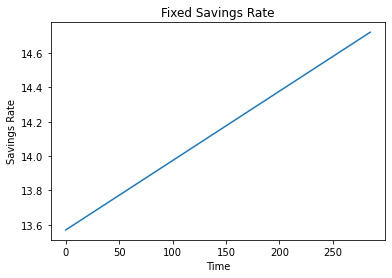

In [5]:
import numpy as np
#Create a fixed savings rate
fixed_savings_rate = np.copy(data_loader.SAVING_RATE_INIT_ARRAY).reshape(-1, 1)
#fixed_savings_rate Validated with RICE50 for timestep 1 and 5

set_year = time_horizon.model_time_horizon


for i, years in enumerate(set_year):
    
    t = i+1 #index starts at 0, so add 1 to get the year

    if t != 1: # no need to repeat for the first year

        next_rate = data_loader.SAVING_RATE_INIT_ARRAY + (model.get_optimal_long_run_savings_rate() - data_loader.SAVING_RATE_INIT_ARRAY)*((t - 1)/(len(set_year) - 1))
        # append to the fixed savings rate array for each year
        fixed_savings_rate = np.column_stack((fixed_savings_rate, next_rate))

from matplotlib import pyplot as plt
plt.plot(np.sum(fixed_savings_rate, axis=0))
plt.title("Fixed Savings Rate")
plt.xlabel("Time")
plt.ylabel("Savings Rate")
plt.show()

In [10]:
len(set_year)

286

In [6]:
scenario = SSP.SSP1
print(scenario.value)

for i in range(len(set_year)):
    output = model.run(scenario = scenario.value, timestep=i, savings_rate=fixed_savings_rate[:, i])
    print(i)

SSP1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [13]:
print(output)

[[ 0.          0.81509442  0.79232724 ...  6.94579793  6.94579793
   6.94579793]
 [ 0.          0.93612893  0.95145495 ...  7.27020478  7.27020478
   7.27020478]
 [ 0.          0.37140506  0.37244727 ...  1.39676875  1.39676875
   1.39676875]
 ...
 [ 0.         15.39879239 15.57116239 ... 62.88539915 62.88539915
  62.88539915]
 [ 0.          0.51693829  0.54959207 ...  7.12006414  7.12006414
   7.12006414]
 [ 0.          0.57197902  0.56675445 ...  6.18272483  6.18272483
   6.18272483]]


In [7]:
import pandas as pd
testdf = pd.DataFrame(output)